In [1]:
import numpy
import scipy
import pandas
import PIL
from PIL import Image
import os

pwd = os.getcwd()

print(pwd)

/home/necromath/ml_projects


In [2]:
import sys

modulename = 'PIL'
if modulename not in sys.modules:
    print ('You have not imported the {} module'.format(modulename))

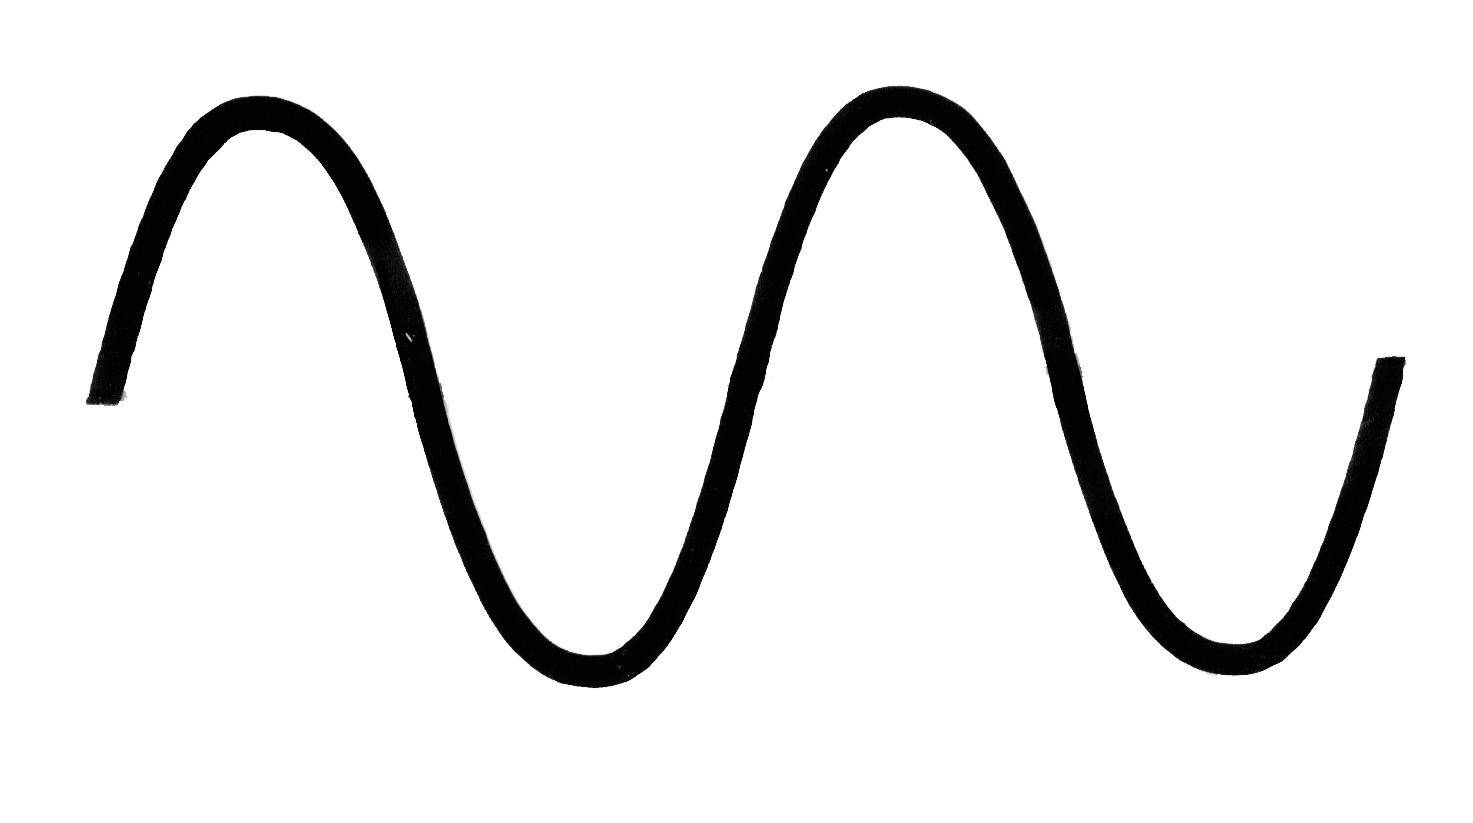

In [23]:
z='/home/necromath/ml_projects/sinewave.png'
bwimg = PIL.Image.open(z)

display(bwimg)

In [24]:
bwimg_array=numpy.asarray(bwimg)
a = numpy.array(bwimg_array)
print(a.shape)

(823, 1473, 2)


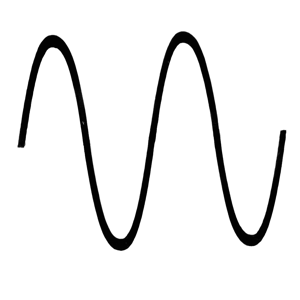

[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[[255 255]
  [255 255]
  [255 255]]

 [[255 255]
  [255 255]
  [255 255]]

 [[255 255]
  [255 255]
  [255 255]]]


In [25]:
bwimg_resized = bwimg.resize((300,300))
bwimg_re_array = numpy.asarray(bwimg_resized)
display(bwimg_resized)
#print(bwimg_re_array.shape)
#print(bwimg_re_array)

i=150
j=75

x = [bwimg_re_array[i-1][j-1],bwimg_re_array[i][j-1],bwimg_re_array[i+1][j-1],
     bwimg_re_array[i-1][j],bwimg_re_array[i][j],bwimg_re_array[i+1][j],
     bwimg_re_array[i-1][j+1],bwimg_re_array[i][j+1],bwimg_re_array[i+1][j+1]
    ]
moving_array = numpy.zeros((3,3),int)

y = numpy.reshape(x,(3,3,2))
print (moving_array)
print(y)

In [ ]:
sample_step_x = numpy.linspace(1,300,100,dtype=int)
print(sample_step_x)

number1=numpy.arange(1,100)
number1=number1.tolist()
number2=numpy.arange(1,20)
number2=number2.tolist()

sample_step_y = numpy.linspace(1,300,20,dtype=int)
print(sample_step_y)

In [ ]:
for i,j in zip(number1,number2):
    print ("This is the " +str(int(sample_step_x[i])) + " step")

In [ ]:
def unique(list1):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
            

In [ ]:
narr1 = numpy.array([bwimg_re_array[0]])
narr2 = numpy.array([bwimg_re_array[1]])

result_variable = (narr1 == narr2).all()

if(result_variable == True):
   print(" Yes!! The given arrays are equal. ")

In [ ]:
for i in range(bwimg_re_array.size-1):
    narr1 = numpy.array([bwimg_re_array[i]])
    narr2 = numpy.array([bwimg_re_array[i+1]])

    result_variable = (narr1 == narr2).all()

    if(result_variable == True):
        print("Yes, the "+ str(i)+"th array is the same as the " +str(i+1)+ "th array")
    else:
        print("No they are not and it is because")
        difference = list(set(narr1.asarray) -set(narr2.asarray))
        print(difference)

In [ ]:
import cv2

# Load your image
image = cv2.imread(z)

# Resize the image to 300x300
image = cv2.resize(image, (300, 300))

# Get the dimensions of the resized image
height, width, _ = image.shape

# Define the size of the grid (3x3)
grid_size = (3, 3)

# Loop through the image with 3-pixel jumps
for y in range(0, height - grid_size[0] + 1, 3):
    for x in range(0, width - grid_size[1] + 1, 3):
        # Extract the 3x3 grid
        grid = image[y:y+grid_size[0], x:x+grid_size[1]]
        
        # You can perform operations on the grid here, for example, display it
        cv2.imshow('Grid', grid)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

# Close any open windows
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(z)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to identify black pixels
_, thresholded_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)

# Create a green background image
green_background = np.zeros_like(image)
green_background[:, :] = (0, 255, 0)  # Set it to green (BGR color format)

# Create a result image by combining the green background and black pixels
result_image = cv2.addWeighted(green_background, 1, image, 1, 0)

# Save or display the result_image
cv2.imwrite('result_image.jpg', result_image)
cv2.imshow('Result Image', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [7]:
import cv2
import numpy as np

# Load the image you want to analyze
image = cv2.imread(z)

# Convert the image to grayscale for color comparison
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define a threshold for color change detection (adjust as needed)
threshold = 30

# Find pixel coordinates where color changes significantly
significant_change_coords = np.where(cv2.absdiff(gray_image, gray_image.mean()) > threshold)

# Create a copy of the original image for output
output_image = image.copy()

# Change the pixel color at the significant change coordinates
for x, y in zip(*significant_change_coords):
    output_image[x, y] = [0, 255, 0]  # Change to red (BGR format)

# Save the output image
cv2.imwrite('output_image.jpg', output_image)


True

In [8]:
output_image = cv2.imread('output_image.jpg')

# Display the image in a window
cv2.imshow('Output Image', output_image)

In [7]:
import cv2
import numpy as np
z='/home/necromath/ml_projects/sinewave.png'
# Load the image
image = cv2.imread(z)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edge image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours
for contour in contours:
    # Fit a line to the contour
    if len(contour) >= 2:
        # Fit a line using the least squares method
        vx, vy, x, y = cv2.fitLine(contour, cv2.DIST_L2, 0, 0.01, 0.01)
        
        # Calculate start and end points for the line
        lefty = int((-x * vy / vx) + y)
        righty = int(((image.shape[1] - x) * vy / vx) + y)
        
        # Draw the line on the original image
        cv2.line(image, (image.shape[1] - 1, righty), (0, lefty), (0, 0, 255), 2)

# Display the image with highlighted curves
cv2.imshow('Highlighted Curves', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
import cv2
import numpy as np

z='/home/necromath/ml_projects/sinewave.png'
# Load the image
image = cv2.imread(z)

    # Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, 50, 150)

    # Display the Canny edge detection result
cv2.imshow('Canny Edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


(300, 300)
<class 'numpy.ndarray'>


<Figure size 432x288 with 0 Axes>

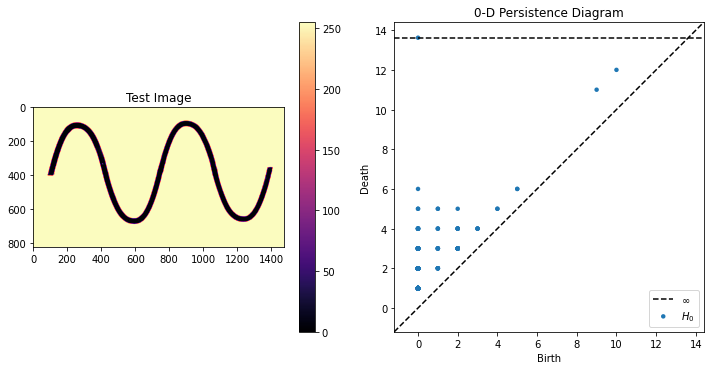

In [33]:
import matplotlib.pyplot as plt
from ripser import ripser, lower_star_img
from sklearn.datasets import load_digits
from persim import plot_diagrams
import numpy
import PIL

digits = load_digits()
z = PIL.Image.open('/home/necromath/ml_projects/sinewave.png')
z = z.convert("L")
z_array=numpy.asarray(z)
#print(z_array)
z_resized = z.resize((300,300))
z_re_array = numpy.asarray(z_resized)
print(z_re_array.shape)
plt.magma()
#plt.matshow(digits.images[52])
#print(z_re_array.shape())
#plt.show()
print(type(digits.images[1]))

dgm = lower_star_img(z_re_array)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(z)
plt.colorbar()
plt.title("Test Image")
plt.subplot(122)
plot_diagrams(dgm)
plt.title("0-D Persistence Diagram")
plt.tight_layout()
plt.show()


(300, 300)
<class 'numpy.ndarray'>


<Figure size 640x480 with 0 Axes>

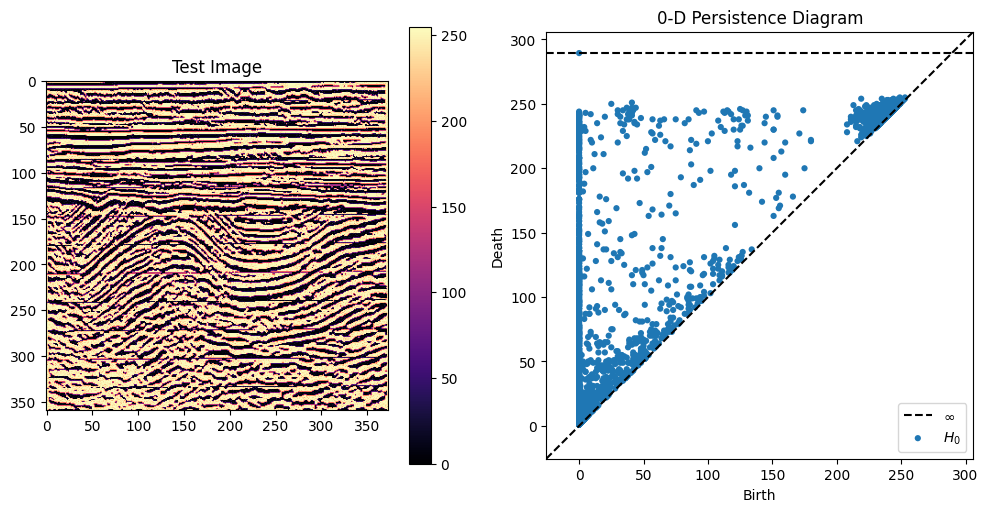

In [34]:
digits = load_digits()
z = PIL.Image.open('/home/necromath/ml_projects/SeismicImage.jpg')
z = z.convert("L")
z_array=numpy.asarray(z)
#print(z_array)
z_resized = z.resize((300,300))
z_re_array = numpy.asarray(z_resized)
print(z_re_array.shape)
plt.magma()
#plt.matshow(digits.images[52])
#print(z_re_array.shape())
#plt.show()
print(type(digits.images[1]))

dgm = lower_star_img(z_re_array)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(z)
plt.colorbar()
plt.title("Test Image")
plt.subplot(122)
plot_diagrams(dgm)
plt.title("0-D Persistence Diagram")
plt.tight_layout()
plt.show()